In [ ]:

import pandas as pd
import numpy as np
import pickle
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Load dataset
data = pd.read_csv('IMDB Dataset.csv').dropna()

# Extract features and labels
d1 = data['review']
d2 = data['sentiment']

# One-hot encode sentiment labels
d22 = pd.get_dummies(d2).values  # [1,0] for neg, [0,1] for pos

In [ ]:
# HashingVectorizer (using a fixed number of features)
vectorizer = HashingVectorizer(n_features=2**20)  # Set a fixed number of features (e.g., 2^20)
d11 = vectorizer.fit_transform(d1)  # result is sparse matrix

In [ ]:
# Save vectorizer for later use (this will not save the vocabulary, since it's stateless)
with open("hashing_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [ ]:
# Train/val/test split (preserving sparse format)
xtv, xtest, ytv, ytest = train_test_split(d11, d22, test_size=0.2, random_state=42, shuffle=True)
xtrain, xval, ytrain, yval = train_test_split(xtv, ytv, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# Sparse-compatible Keras model
input_layer = tf.keras.Input(shape=(xtrain.shape[1],), sparse=True)
x = layers.Dense(8, activation='relu')(input_layer)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(2, activation='softmax')(x)

model = keras.Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Show model summary
model.summary()

In [ ]:
# Train the model (sparse input directly)
history = model.fit(
    x=xtrain,
    y=ytrain,
    validation_data=(xval, yval),
    epochs=30,
    batch_size=64
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1048576)]         0         
                                                                 
 dense_13 (Dense)            (None, 8)                 8388616   
                                                                 
 batch_normalization_7 (Batc  (None, 8)                32        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_14 (Dense)            (None, 2)                 18        
                                                                 
Total params: 8,388,666
Trainable params: 8,388,650
Non-trainable params: 16
________________________________________________

C:\Users\hj777\AppData\Local\Programs\Python\Python39\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model_1/dense_13/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model_1/dense_13/embedding_lookup_sparse/Reshape:0", shape=(None, 8), dtype=float32), dense_shape=Tensor("gradient_tape/model_1/dense_13/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


500/500 [==============================] - 19s 21ms/step - loss: 0.6626 - accuracy: 0.6915 - val_loss: 0.6678 - val_accuracy: 0.7874
Epoch 2/30
500/500 [==============================] - 10s 19ms/step - loss: 0.6032 - accuracy: 0.7971 - val_loss: 0.5780 - val_accuracy: 0.8207
Epoch 3/30
500/500 [==============================] - 10s 21ms/step - loss: 0.5590 - accuracy: 0.8212 - val_loss: 0.5350 - val_accuracy: 0.8364
Epoch 4/30
500/500 [==============================] - 10s 19ms/step - loss: 0.5249 - accuracy: 0.8354 - val_loss: 0.5020 - val_accuracy: 0.8435
Epoch 5/30
500/500 [==============================] - 10s 20ms/step - loss: 0.4937 - accuracy: 0.8462 - val_loss: 0.4746 - val_accuracy: 0.8512
Epoch 6/30
500/500 [==============================] - 10s 19ms/step - loss: 0.4686 - accuracy: 0.8554 - val_loss: 0.4509 - val_accuracy: 0.8577
Epoch 7/30
500/500 [==============================] - 10s 20ms/step - loss: 0.4485 - accuracy: 0.8621 - val_loss: 0.4305 - val_accuracy: 0.8625
Epo

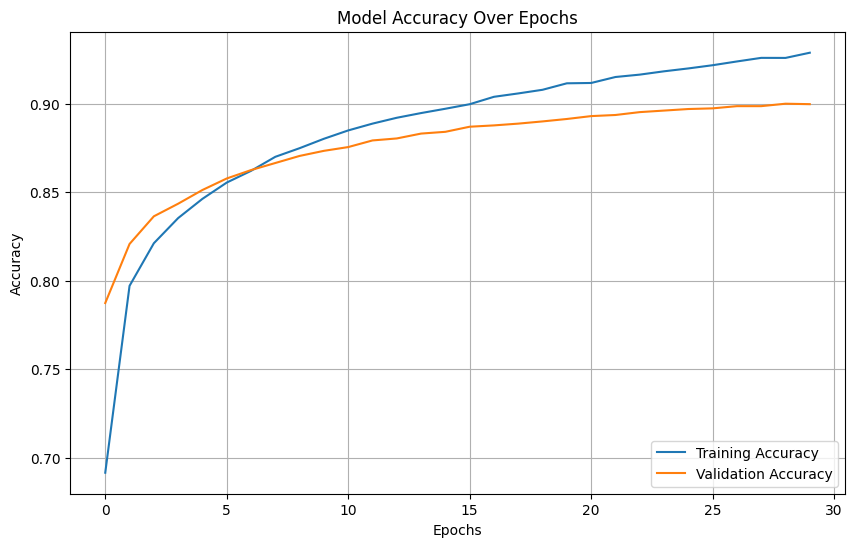

In [61]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have the 'history' object

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [64]:
# Evaluate the model
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f"Test Accuracy: {test_acc:.4f}")



313/313 [==============================] - 3s 9ms/step - loss: 0.2640 - accuracy: 0.9009
Test Accuracy: 0.9009


In [65]:
# Save the model
model.save("sentiment.h5")

In [1]:
# Load the necessary libraries
from keras.models import load_model
from sklearn.feature_extraction.text import HashingVectorizer
import numpy as np

# Load the saved model
model = load_model("sentiment.h5")

# Initialize the HashingVectorizer with the same parameters used during training
vectorizer = HashingVectorizer(n_features=2**20)  # Use the same n_features as in training

# Inference: Taking user input for review
ww = input("Enter your review: ")

# Create the test set with user input
test_set = [ww]

# Transform the input text into the hashed feature space (same way it was done during training)
new_test = vectorizer.transform(test_set)

# Predict the sentiment of the review
res = np.argmax(model.predict(new_test))

# Output the result
if res == 0:
    print("Negative")
else:
    print("Positive")


Enter your review:  i like it


1/1 [==============================] - 2s 2s/step
Positive
